# Load Required Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import gc

# Modeling

In [2]:
Data = pd.read_parquet('clean_df.parq')

In [3]:
TrannsformedTypes = Data.copy()
TrannsformedTypes['stk_year'] =TrannsformedTypes['stk_year'].apply(lambda x: str(x) if not pd.isnull(x) else x)
TrannsformedTypes['door_count'] =TrannsformedTypes['door_count'].apply(lambda x: str(x) if not pd.isnull(x) else x)
TrannsformedTypes['seat_count'] =TrannsformedTypes['seat_count'].apply(lambda x: str(x) if not pd.isnull(x) else x)

In [4]:
TrannsformedTypes.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
stk_year                object
transmission            object
door_count              object
seat_count              object
fuel_type               object
date_created            object
date_last_seen          object
price_eur              float64
dtype: object

In [5]:
X = TrannsformedTypes[
    [
        "stk_year",
        "maker",
        "model",
        "body_type",
        "transmission",
        "door_count",
        "seat_count",
        "fuel_type",
        "mileage",
        "manufacture_year",
        "engine_displacement",
        "engine_power",
    ]
]
dummies = pd.get_dummies(X)
y = TrannsformedTypes[["price_eur"]]

In [6]:
del X,Data,TrannsformedTypes
gc.collect()

0

In [7]:
reg = DecisionTreeRegressor().fit(dummies,y)

In [8]:
y_pred = reg.predict(dummies)

In [9]:
r2_score(y_pred, y)

0.6749596337001986

In [10]:
dummies['Y'] = y
dummies['Pred'] = y_pred
dummies['Diff'] = (dummies['Y']-dummies['Pred']).abs()

In [11]:
gc.collect()

0

In [12]:
Data = pd.read_parquet('clean_df.parq')

In [13]:
Data['Pred'] =dummies['Pred']
Data['Diff'] = dummies['Diff']


In [14]:
Data=Data.sort_values(by='Diff',ascending=False)

In [15]:
Data.to_parquet('PredictionDifferences.parq')

<Axes: >

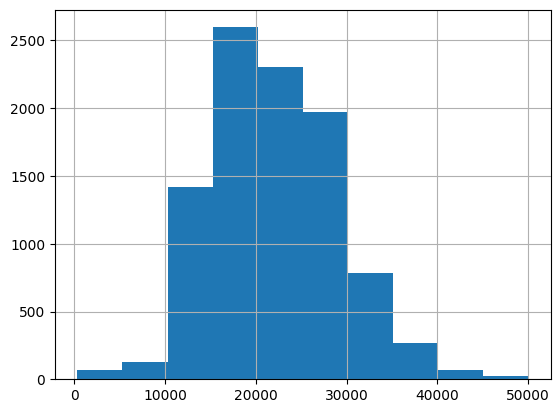

In [16]:
Data[(Data['maker']== 'volkswagen') & (Data['model']== 'tiguan')]['price_eur'].hist()